# Data Science and Visualization (RUC F2023)

## Lecture 7: Clustering I

 # Dendrogram
 
 We show how to generate dengrograms, and how to decide the number of clusters from a dendrogram. 

## 0. Importing the Required Libraries and Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
customer_data = pd.read_csv('C:/Data/shopping_data.csv')
customer_data.shape

(200, 5)

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Feature Selection

We only focus on the last two columns, i.e., annual income and spending score.

In [5]:
data = customer_data.iloc[:, 3:5].values

## 2. Generating Dendrogram

In the script below, we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

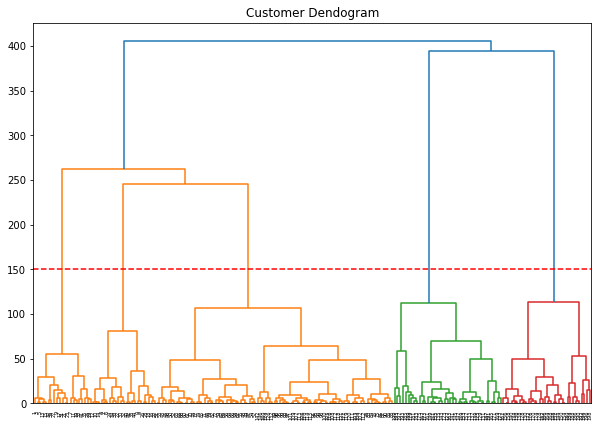

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

plt.axhline(y=150, color='r', linestyle='--')

### Deciding the number of clusters

In the dendrogram locate the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters (when affinity is calculated using the method set in linkage).

## 3. Obtaining the Clusters

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. To do so we will again use the **AgglomerativeClustering** class of the sklearn.cluster library. Note the use of **fit_predict()** function to obtain the clusters.

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

The variable **cluster.labels_** stores the cluster labels for each data point:

In [8]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## 4. Visualizing Clusters

We use the **mglearn** library's **discrete_scatter()** function to plot the points w.r.t. their cluster labels.

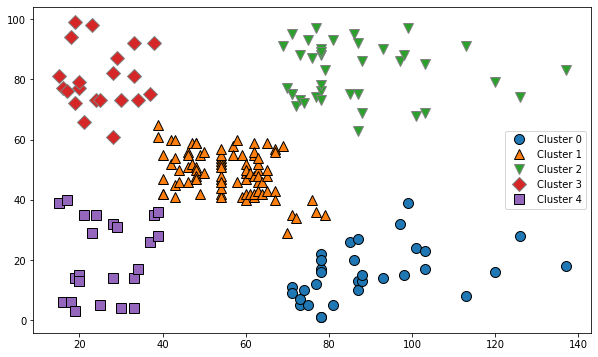

In [25]:
import mglearn

plt.figure(figsize=(10, 6))
#plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
mglearn.discrete_scatter(data[:, 0], data[:, 1], cluster.labels_)

plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], loc="best")

## 5. Effect of Linkage

Now we try out different methods for measuring the Inter-Cluster Similarity when merging clusters in Agglomerative clustering. We plot each dendrogram, and decide the number of clusters for each method.

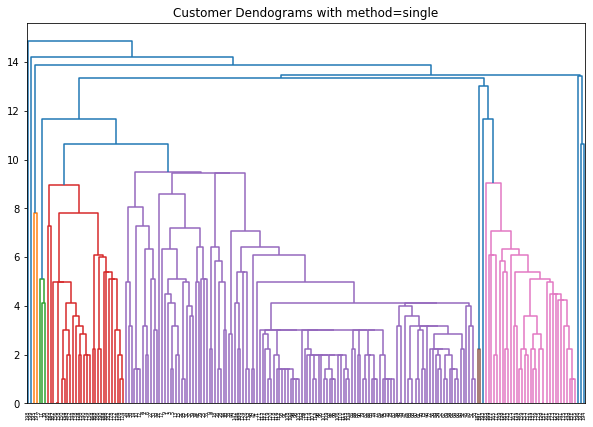

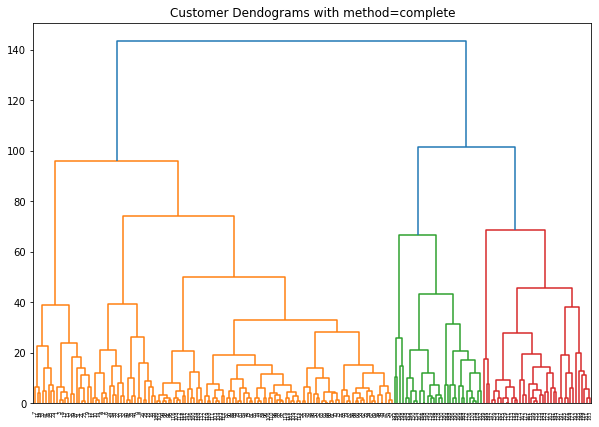

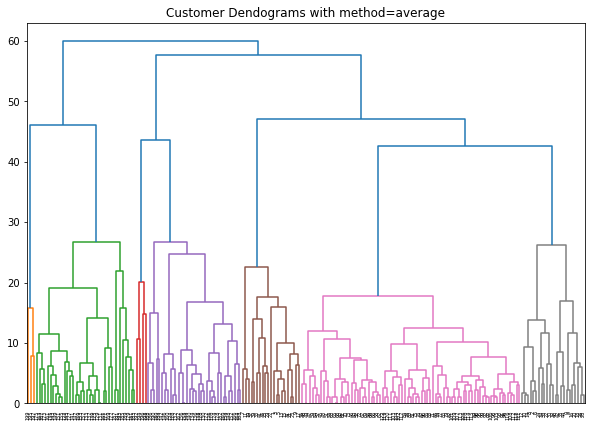

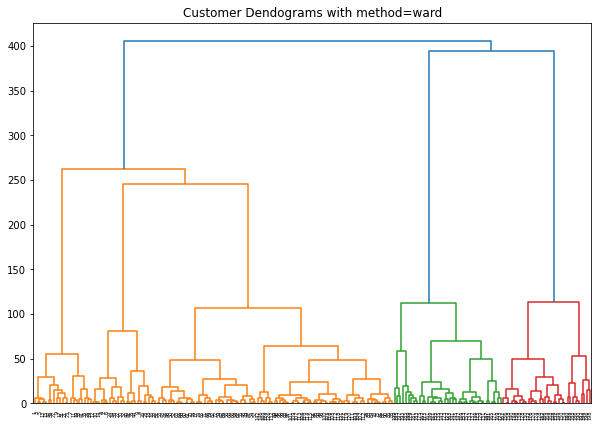

In [20]:
#methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']
methods = ['single', 'complete', 'average', 'ward']

for mth in methods:
    plt.figure(figsize=(10, 7))
    plt.title('Customer Dendograms with method=' + mth)
    dend = shc.dendrogram(shc.linkage(data, method=mth))
    plt.show()

For those methods, we decide the number of clusters as follows:

In [ ]:
cluster_nums = [8, 7, 7, 5]

We generate the clusters for each method using its own number of clusters:

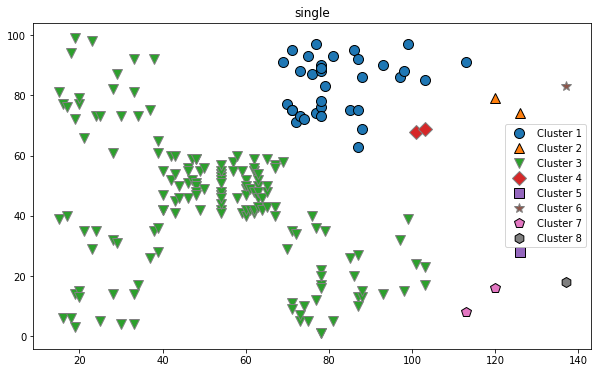

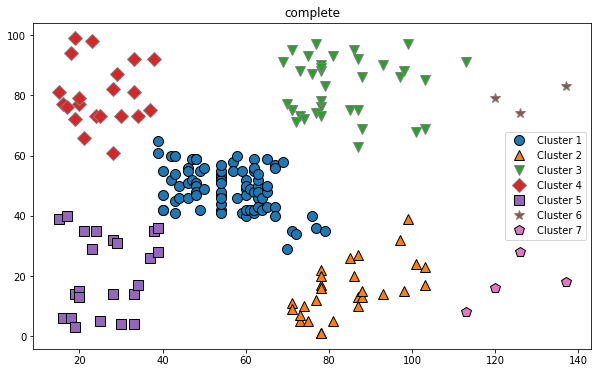

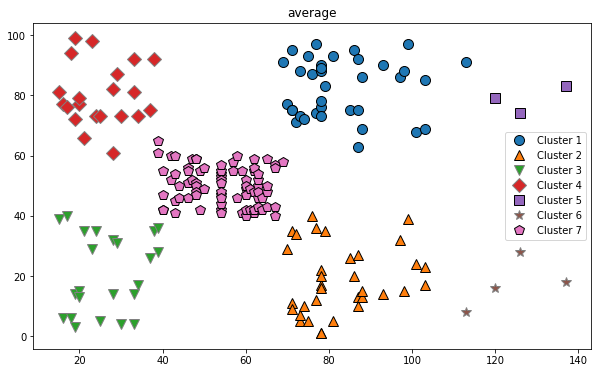

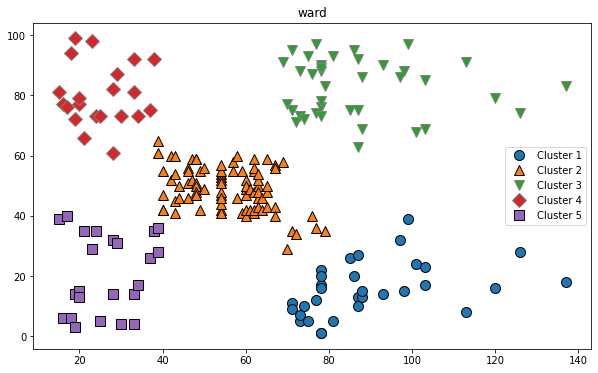

In [23]:
for i in range(0, 4):
    cluster = AgglomerativeClustering(n_clusters=cluster_nums[i], affinity='euclidean', linkage=methods[i])
    cluster.fit_predict(data)
    
    plt.figure(figsize=(10, 6))
    mglearn.discrete_scatter(data[:, 0], data[:, 1], cluster.labels_)

    cluster_list = []
    for j in range(1, cluster_nums[i]+1):
        cluster_list.append('Cluster {0}'.format(j))
    plt.legend(cluster_list, loc="best")
    
    plt.title(methods[i])
    plt.show()

## Reference
* https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/